<a href="https://colab.research.google.com/github/birddropping/IND5003-Group-Project/blob/main/IND5003_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from functools import reduce
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [2]:
data_demo = pd.read_csv('data/demographic.csv')
data_diet = pd.read_csv('data/diet.csv')
data_exam = pd.read_csv('data/examination.csv')
data_labs = pd.read_csv('data/labs.csv')
data_meds = pd.read_csv('data/medications.csv', encoding = "ISO-8859-1") # Had to use this encoding standard to read file
data_qns = pd.read_csv('data/questionnaire.csv')
data_dict = pd.read_excel('NHANES 2014 Dictionary.xlsx')

data_vari = pd.read_excel('Variables.xlsx', squeeze = True)

In [3]:
glu_data = pd.read_sas('data/GLU_H.XPT') # Fasting glucose was not part of the original dataset. Added from NHANES website
data_labs = pd.merge(data_labs, glu_data, how='left', on='SEQN')

In [4]:
#remove duplicates from data_meds as each line covers 1 medication
data_meds_m = data_meds.drop_duplicates(subset = ['SEQN', 'RXDCOUNT'], keep = 'first')

Combine the 6 datasets together as 1 with SEQN as the lead. From there, we can trim out the variables that is not needed for our application of diabetes and mental health.

In [5]:
#create massive dataset
dataset = pd.merge(data_demo, data_diet, how = 'outer', on = ['SEQN'], validate = "1:1")
dataset = pd.merge(dataset, data_exam, how = 'outer', on = ['SEQN'], validate = "1:1")
dataset = pd.merge(dataset, data_labs, how = 'outer', on = ['SEQN'], validate = "1:1")
dataset = pd.merge(dataset, data_meds_m, how = 'outer', on = ['SEQN'], validate = "1:1")
dataset = pd.merge(dataset, data_qns, how = 'outer', on = ['SEQN'], validate = "1:1")
dataset

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1.320Z,DR1.330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,...,PAQ755,PAQ759A,PAQ759B,PAQ759C,PAQ759D,PAQ759E,PAQ759F,PAQ759G,PAQ759H,PAQ759I,PAQ759J,PAQ759K,PAQ759L,PAQ759M,PAQ759N,PAQ759O,PAQ759P,PAQ759Q,PAQ759R,PAQ759S,PAQ759T,PAQ759U,PAQ759V,PAQ762,PAQ764,PAQ766,PAQ679,PAQ750,PAQ770,PAQ772A,PAQ772B,PAQ772C,PAAQUEX,PUQ100,PUQ110,RHQ010,RHQ020,RHQ031,RHD043,RHQ060,RHQ070,RHQ074,RHQ076,RHQ078,RHQ131,RHD143,RHQ160,RHQ162,RHQ163,RHQ166,RHQ169,RHQ172,RHD173,RHQ171,RHD180,RHD190,RHQ197,RHQ200,RHD280,RHQ291,RHQ305,RHQ332,RHQ420,RHQ540,RHQ542A,RHQ542B,RHQ542C,RHQ542D,RHQ554,RHQ560Q,RHQ560U,RHQ570,RHQ576Q,RHQ576U,RHQ580,RHQ586Q,RHQ586U,RHQ596,RHQ602Q,RHQ602U,RXQ510,RXQ515,RXQ520,RXQ525G,RXQ525Q,RXQ525U,RXD530,SLD010H,SLQ050,SLQ060,SMQ020,SMD030,SMQ040,SMQ050Q,SMQ050U,SMD055,SMD057,SMQ078,SMD641,SMD650,SMD093,SMDUPCA,SMD100BR,SMD100FL,SMD100MN,SMD100LN,SMD100TR,SMD100NI,SMD100CO,SMQ621,SMD630,SMQ661,SMQ665A,SMQ665B,SMQ665C,SMQ665D,SMQ670,SMQ848,SMQ852Q,SMQ852U,SMAQUEX2,SMD460,SMD470,SMD480,SMQ856,SMQ858,SMQ860,SMQ862,SMQ866,SMQ868,SMQ870,SMQ872,SMQ874,SMQ876,SMQ878,SMQ880,SMAQUEX.x,SMQ681,SMQ690A,SMQ710,SMQ720,SMQ725,SMQ690B,SMQ740,SMQ690C,SMQ770,SMQ690G,SMQ845,SMQ690H,SMQ849,SMQ851,SMQ690D,SMQ800,SMQ690E,SMQ817,SMQ690I,SMQ857,SMQ690J,SMQ861,SMQ863,SMQ690F,SMQ830,SMQ840,SMDANY,SMAQUEX.y,SXD021,SXQ800,SXQ803,SXQ806,SXQ809,SXQ700,SXQ703,SXQ706,SXQ709,SXD031,SXD171,SXD510,SXQ824,SXQ827,SXD633,SXQ636,SXQ639,SXD642,SXQ410,SXQ550,SXQ836,SXQ841,SXQ853,SXD621,SXQ624,SXQ627,SXD630,SXQ645,SXQ648,SXQ610,SXQ251,SXQ590,SXQ600,SXD101,SXD450,SXQ724,SXQ727,SXQ130,SXQ490,SXQ741,SXQ753,SXQ260,SXQ265,SXQ267,SXQ270,SXQ272,SXQ280,SXQ292,SXQ294,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,1.0,1.0,1,1

In [6]:
#create list of variables
col_list = data_vari.tolist()

In [7]:
#create empty dataframe
data_final = pd.DataFrame()

#fill empty dataframe with pandas series from each variable via iteration
for i in col_list:
    data_final = pd.concat([data_final, dataset[i]], axis=1)
    #data_final = pd.concat(data_final, dataset[i], axis=1)
    #print(dataset[i])
data_final

,SEQN,RXDCOUNT,RXDDAYS,RIAGENDR,RIDAGEYR,RIDRETH1,BMXBMI,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BPXSY3,BPXDI3,DR1TALCO,DR1.320Z,LBDGLTSI,LBDGLUSI,LBDHDDSI,LBDTRSI,LBDLDLSI,LBDTCSI,LBXIN,PHAFSTMN.x,LBXGH,DIQ160,DIQ170,DIQ172,DIQ175A,DBD895,DBD900,DBD905,DBD910,FSD151,FSQ165,FSQ012,FSD012N,FSD230,FSD225,FSQ235,INDHHIN2,INDFMIN2,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,PAD645,PAQ650,PAQ655,PAD660,PAQ665,PAQ670,PAD675,PAD680,PAQ706,PAQ710,PAQ715,WHQ030,WHQ070,DBQ700,HSD010,WHD110,WHD120,BMXWT
0,73557,2.0,NaN,1,69,4,26.7,122.0,72.0,114.0,76.0,102.0,74.0,0.0,960.0,NaN,NaN,1.68,NaN,NaN,4.32,NaN,47.0,13.9,NaN,NaN,NaN,NaN,8.0,8.0,0.0,4.0,2.0,1.0,1.0,2.0,1.0,26.0,492.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,600.0,NaN,2.0,8.0,3.0,NaN,2.0,2.0,270.0,200.0,78.3
1,73558,4.0,243.0,1,54,3,28.6,156.0,62.0,160.0,80.0,156.0,42.0,119.0,360.0,NaN,NaN,1.29,NaN,NaN,4.40,NaN,14.0,9.1,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2.0,2.0,1.0,1.0,3.0,2.0,230.0,242.0,7.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,1.0,1.0,10.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,540.0,NaN,4.0,8.0,3.0,2.0,3.0,4.0,240.0,250.0,89.5
2,73559,5.0,365.0,1,72,3,28.9,140.0,90.0,140.0,76.0,146.0,80.0,0.0,1254.0,NaN,10.713,1.55,0.576,1.448,3.26,5.83,51.0,8.9,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN,1.0,7.0,30.0,2.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,180.0,300.0,NaN,4.0,0.0,3.0,2.0,3.0,3.0,180.0,190.0,88.9
3,73560,NaN,NaN,1,9,3,17.1,108.0,38.0,102.0,34.0,104.0,38.0,0.0,225.0,NaN,NaN,1.58,NaN,NaN,4.34,NaN,35.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,6.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,32.2
4,73561,4.0,152.0,2,73,3,19.7,136.0,86.0,134.0,88.0,142.0,86.0,0.0,240.0,NaN,5.940,2.20,0.847,2.612,5.20,6.12,42.0,4.9,2.0,2.0,2.0,NaN,0.0,NaN,4.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,15.0,15.0,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,NaN,NaN,1.0,2.0,30.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,480.0,NaN,1.0,1.0,2.0,2.0,2.0,5.0,150.0,135.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,83727,NaN,NaN,1,26,2,24.5,110.0,68.0,116.0,74.0,112.0,76.0,14.0,867.0,5.995,5.995,1.42,0.914,3.077,4.91,3.76,30.0,5.0,2.0,2.0,2.0,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,77.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,600.0,NaN,2.0,1.0,3.0,2.0,4.0,3.0,NaN,NaN,71.8
10171,83728,NaN,NaN,2,2,1,15.9,NaN,NaN,NaN,NaN,NaN,NaN,0.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,11.3
10172,83729,NaN,NaN,2,42,4,34.0,136.0,82.0,130.0,82.0,138.0,80.0,0.0,1014.0,NaN,NaN,1.24,NaN,NaN,3.93,NaN,58.0,5.3,2.0,2.0,2.0,NaN,6.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,3.0,60.0,720.0,NaN,5.0,1.0,1.0,1.0,3.0,NaN,155.0,135.0,89.6
10173,83730,NaN,NaN,1,7,2,16.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.32,NaN,NaN,4.32,NaN,4.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2.0,2.0,1.0,1.0,4.0,1.0,6.0,160.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,22.8


In [8]:
database_final = data_final[data_final['LBXGH'].notna()]

In [74]:
#Create working database for activity
activity = ["LBXGH","PAQ605", "PAQ620", "PAQ635", "PAQ650", "PAQ665", "PAD680", "PAQ706", "PAQ710", "PAQ715"]
activity_wk = database_final.loc[:,activity]

#drop "PAQ706" due to poor data
#code out target variable "DM"
#code activity levels
activity1 = ["LBXGH","PAQ605", "PAQ620", "PAQ635", "PAQ650", "PAQ665", "PAD680", "PAQ710", "PAQ715"]
activity_wk = database_final.loc[:,activity1]
activity_wk["DM"] = activity_wk["LBXGH"]>6.5
activity_wk["activity_lvl_high"] = (activity_wk["PAQ605" or "PAQ650"] ==1)
activity_wk["activity_lvl_med"] =  (activity_wk["PAQ620" or "PAQ665"] ==1)
activity_wk["activity_lvl_low"] =  (activity_wk["PAQ605" and "PAQ650" and "PAQ620" and "PAQ665"] !=1)

activity_wk["activity_lvl_high"].replace(True, 1, inplace=True)
activity_wk["activity_lvl_high"].replace(False, np.NaN, inplace=True)
activity_wk["activity_lvl_med"].replace(True, 2, inplace=True)
activity_wk["activity_lvl_med"].replace(False, np.NaN, inplace=True)
activity_wk["activity_lvl_low"].replace(True, 3, inplace=True)
activity_wk["activity_lvl_low"].replace(False, np.NaN, inplace=True)
#activity_wk[activity_wk["activity_lvl_high"]==0].replace(0,activity_wk["activity_lvl_med"], inplace=True )
#activity_wk["activity_lvl_high"].replace(0,activity_wk["activity_lvl_med"], inplace =True)
activity_wk["activity_lvl"] = activity_wk[["activity_lvl_high", "activity_lvl_med", "activity_lvl_low"]].min(axis=1)

In [75]:
activity_wk

,LBXGH,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,PAQ710,PAQ715,DM,activity_lvl_high,activity_lvl_med,activity_lvl_low,activity_lvl
0,13.9,2.0,2.0,2.0,2.0,2.0,600.0,2.0,8.0,True,NaN,NaN,3.0,3.0
1,9.1,2.0,1.0,2.0,2.0,2.0,540.0,4.0,8.0,True,NaN,2.0,3.0,2.0
2,8.9,2.0,1.0,2.0,2.0,1.0,300.0,4.0,0.0,True,NaN,2.0,NaN,2.0
4,4.9,2.0,1.0,2.0,2.0,2.0,480.0,1.0,1.0,False,NaN,2.0,3.0,2.0
5,5.5,1.0,2.0,2.0,2.0,2.0,360.0,5.0,8.0,False,1.0,NaN,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10164,5.4,2.0,2.0,2.0,1.0,1.0,240.0,2.0,8.0,False,NaN,NaN,NaN,NaN
10166,7.4,2.0,2.0,2.0,2.0,1.0,360.0,3.0,8.0,True,NaN,NaN,NaN,NaN
10167,5.5,2.0,2.0,2.0,2.0,1.0,360.0,2.0,8.0,False,NaN,NaN,NaN,NaN
10170,5.0,2.0,2.0,2.0,2.0,2.0,600.0,2.0,1.0,False,NaN,NaN,3.0,3.0


In [67]:
activity_wk["activity_lvl_high"].compare(activity_wk["activity_lvl_med"],keep_shape = True)

,self,other
0,NaN,NaN
1,0.0,1.0
2,0.0,1.0
4,0.0,1.0
5,1.0,0.0
...,...,...
10164,NaN,NaN
10166,NaN,NaN
10167,NaN,NaN
10170,NaN,NaN


In [10]:
activity_wk.info()
#NA check
activity_wk.isna().sum()
#remove NAs
activity_wk = activity_wk.dropna()

<class 'pandas.core.frame.DataFrame'>
Index: 6643 entries, 0 to 10172
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LBXGH              6643 non-null   float64
 1   PAQ605             6622 non-null   float64
 2   PAQ620             6622 non-null   float64
 3   PAQ635             6621 non-null   float64
 4   PAQ650             6621 non-null   float64
 5   PAQ665             6619 non-null   float64
 6   PAD680             6613 non-null   float64
 7   PAQ710             6617 non-null   float64
 8   PAQ715             6617 non-null   float64
 9   DM                 6643 non-null   bool   
 10  activity_lvl_high  6643 non-null   bool   
 11  activity_lvl_med   6643 non-null   bool   
 12  activity_lvl_low   6643 non-null   bool   
dtypes: bool(4), float64(9)
memory usage: 544.9+ KB


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
X = activity_wk.iloc[:,7:13].drop(["DM"],axis =1)
y = activity_wk.iloc[:,9]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [15]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2433    1]
 [ 211    0]]
              precision    recall  f1-score   support

       False       0.92      1.00      0.96      2434
        True       0.00      0.00      0.00       211

    accuracy                           0.92      2645
   macro avg       0.46      0.50      0.48      2645
weighted avg       0.85      0.92      0.88      2645



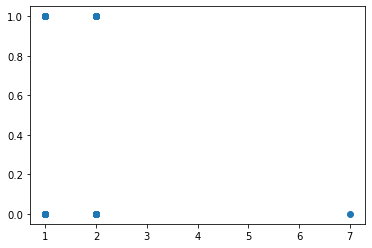

In [16]:
#EDA
import matplotlib.pyplot as plt
#for i in activity1:
    #plt.scatter(activity_wk[i],activity_wk["LBXGH"])
plt.scatter(activity_wk["PAQ605"],activity_wk["DM"])

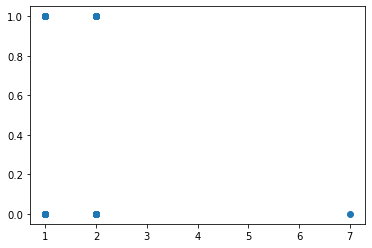

In [17]:
plt.scatter(activity_wk["PAQ605"],activity_wk["DM"])